In [97]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import keras

#dataset
dataset = 100000

np.random.seed(50)

#產生dataset列 X2行的0~1隨機數字
D=np.random.random(size=(dataset,2))
#velocity 假設初速
V=D[:,0]*100
#theta 假設角度
theta=D[:,1]*90
theta

print(V)

#初速平方
v2=pow(V,2)

#sin theta 平方
sin2=pow(np.sin(np.deg2rad(theta)),2)

#sin theta乘 cos theta
sincos=np.multiply(np.sin(np.deg2rad(theta)),np.cos(np.deg2rad(theta)))


#拋物線公式計算Max H & R
H=np.multiply(v2,sin2)/2/9.8
R=2*np.multiply(v2,sincos)/9.8

#將數據重新reshaape
V=np.reshape(V,(dataset,-1))
theta=np.reshape(theta,(dataset,-1))
R=np.reshape(R,(dataset,-1))
H=np.reshape(H,(dataset,-1))


#將數據append一起
dataset1=np.append(V,theta, axis=1)
dataset1=np.append(dataset1,R, axis=1)
dataset1=np.append(dataset1,H, axis=1)
print("    Velocity   ,  theta   ,     Max R ,      Max H")
print(dataset1)


[49.46016455 25.54739238 37.73150977 ... 37.20660925 74.8116243
 28.25759976]
    Velocity   ,  theta   ,     Max R ,      Max H
[[ 49.46016455  20.5274794  163.94822238  15.34684174]
 [ 25.54739238  35.66969188  63.09782844  11.32244925]
 [ 37.73150977  89.69168071   1.56344267  72.63395941]
 ...
 [ 37.20660925  80.89689707  44.13444777  68.86126085]
 [ 74.8116243   64.06090058 449.2844039  230.91500595]
 [ 28.25759976  66.47708834  59.63422266  34.24987036]]


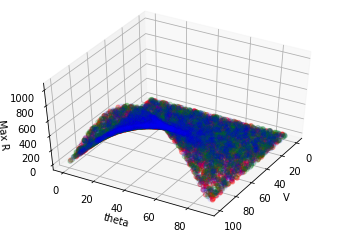

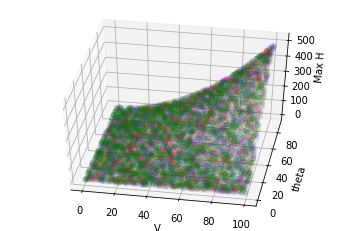

In [98]:
fig1 = plt.figure()
ax = plt.axes(projection='3d')

# 將random數據分成三種顏色繪製
ax.scatter(V[:3000], theta[:3000], R[:3000], c='r',alpha=0.3)  # 繪製數據點
ax.scatter(V[3000:6000], theta[3000:6000], R[3000:6000], c='g',alpha=0.2)
ax.scatter(V[6000:10000], theta[6000:10000], R[6000:10000], c='b',alpha=0.05)
ax.set_zlabel('Max R')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
ax.view_init(45, 30)
plt.savefig('MaxRdata.png',dpi=150)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(V[:3000], theta[:3000], H[:3000], c='r',alpha=0.05)  # 繪製數據點
ax.scatter(V[3000:6000], theta[3000:6000], H[3000:6000], c='g',alpha=0.1)
ax.scatter(V[6000:10000], theta[6000:10000], H[6000:10000], c='b',alpha=0.05)
ax.set_zlabel('Max H')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
ax.view_init(45, -80)
plt.savefig('MaxHdata.png',dpi=150)


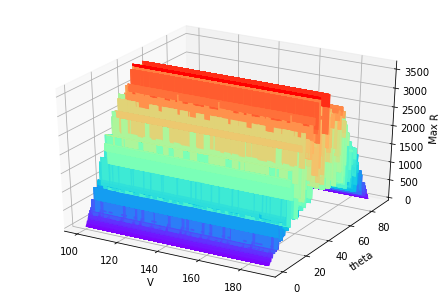

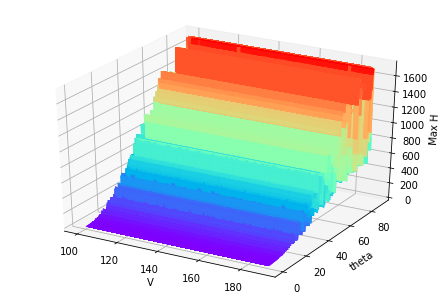

In [99]:
V1 = np.arange(100, 190, 0.25)
theta1 = np.arange(0, 90, 0.25)

random.shuffle(V1)

#初速平方
v2_2=pow(V1,2)
#sin theta 平方
sin2_2=pow(np.sin(np.deg2rad(theta1)),2)

#sin theta乘 cos theta
sincos_2=np.multiply(np.sin(np.deg2rad(theta1)),np.cos(np.deg2rad(theta1)))

R1=2*np.multiply(v2_2,sincos_2)/9.8
H1=np.multiply(v2_2,sin2_2)/2/9.8

V1=np.reshape(V1,(360,-1))
theta1=np.reshape(theta1,(360,-1))
R1=np.reshape(R1,(360,-1))
H1=np.reshape(H1,(360,-1))

X0, Y0 = np.meshgrid(V1, theta1)    # V-theta 平面的网格
#繪製V-theta- Max R曲面圖
fig3 = plt.figure()
ax = Axes3D(fig3)
ax.plot_surface(X0, Y0, R1, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.set_zlabel('Max R')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
plt.savefig('MaxR.png',dpi=150)

#繪製V-theta- Max H曲面圖
fig4 = plt.figure()
ax = Axes3D(fig4)
ax.plot_surface(X0, Y0, H1, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.set_zlabel('Max H')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
plt.savefig('MaxH.png',dpi=150)

In [100]:
#將數據append一起
dataset2=np.append(V1,theta1, axis=1)
dataset2=np.append(dataset2,R1, axis=1)
dataset2=np.append(dataset2,H1, axis=1)

dataset3=np.vstack((dataset2,dataset1))
dataset3=np.vstack((dataset2,dataset1))

#X為已知初速及仰角 Y為結果之Max R&H
X=dataset1[:,:2]
Y=dataset1[:,2:4]

traindata=0.9*dataset # 取資料點當中前 90% 筆資料當作 training data
testdata=0.1*dataset # 取資料點當中，後 10% 筆資料當作 testing data

# 建立 trainig 與 testing data
X_train, Y_train = X[:int(traindata)], Y[:int(traindata)]
X_test, Y_test = X[int(traindata):], Y[int(traindata):]

In [101]:
model = keras.models.Sequential()

# 定義一個輸入變數，設定一個輸入層及兩個隱藏層
model.add(keras.layers.Dense(2, input_dim=2,kernel_initializer='normal', activation='relu'))    
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(keras.layers.Dense(2, activation='relu'))

# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#compile
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

# 引入Tensorboard
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./logs',  # log 目录
                 histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
                 batch_size=32,     # 用多大量的数据计算直方图
                 write_graph=True,  # 是否存储网络结构图
                 write_grads=True, # 是否可视化梯度直方图
                 write_images=True,# 是否可视化参数
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)


print( "Training ------------")
# Another way to train the model
history=model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.1,callbacks=[tbCallBack])


print( "\nTesting ------------")
# Evaluate the model with the metrics we defined earlier
score = model.evaluate(X_test, Y_test, verbose=0)

## loss, accuracy = model.evaluate(X_test, Y_test)

print( "test loss: {}".format(score[0])) #loss
print( "test accuracy: {}".format(score[1])) #accuracy


Training ------------
Train on 81000 samples, validate on 9000 samples
Epoch 1/40
81000/81000 [==============================] - 5s 65us/step - loss: 40961.5393 - acc: 0.3714 - val_loss: 11192.4580 - val_acc: 0.8283
Epoch 2/40
81000/81000 [==============================] - 5s 61us/step - loss: 8507.5998 - acc: 0.8033 - val_loss: 6575.0685 - val_acc: 0.7770
Epoch 3/40
81000/81000 [==============================] - 5s 59us/step - loss: 5857.3301 - acc: 0.7726 - val_loss: 5438.2019 - val_acc: 0.7676
Epoch 4/40
81000/81000 [==============================] - 6s 71us/step - loss: 5242.9204 - acc: 0.7688 - val_loss: 5161.5259 - val_acc: 0.7774
Epoch 5/40
81000/81000 [==============================] - 5s 65us/step - loss: 5008.9465 - acc: 0.7712 - val_loss: 4914.1921 - val_acc: 0.7747
Epoch 6/40
81000/81000 [==============================] - 6s 75us/step - loss: 4822.2354 - acc: 0.7763 - val_loss: 4765.2408 - val_acc: 0.7698
Epoch 7/40
81000/81000 [==============================] - 10s 119us/s